# Project Final Stage

<h2>Table of Contents</h2>
<ul>
  <li>1. Introduction</li>
  <li>2. Data Visualizations</li>
  <li>3. Data Analysis</li>
    <li>4. Discussion</li>
</ul>


In [34]:
### Run this cell before continuing.
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)

Before doing any analysis, the data needs to be loaded into this notebook in. Since we want this file to be reproducible from anywhere, the `players.csv` file was loaded onto a github branch and then accessed through there

In [41]:
players <-  read_csv("https://raw.githubusercontent.com/nyamatp123/DSCI/refs/heads/main/players%20(1).csv")
players

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


# **1. Introduction**

## Background Information

In online gaming, understanding player behaviour is important for improving user experience and customizing game features. However, not all players choose to subscribe. Identifying the characteristics and behaviours of players who subscribe can help developers better understand their audience and potentially increase engagement. This project explores which player features are most predictive of newsletter subscription behaviour, using data from a PLAIcraft dataset.

Game companies invest significant resources in player acquisition and retention, with newsletter subscriptions serving as a valuable touchpoint for community building, marketing, and player engagement. However, the characteristics that distinguish subscribers from non-subscribers remain largely unexplored, creating a critical knowledge gap in player behavior analytics.

## Research Question

The primary research question is: **What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?**

Specifically, we aim to explore whether demographic factors (gender, age) and behavioral metrics (played hours, experience level) can effectively predict players' subscription behavior. By employing **K-Nearest Neighbors Classification**, we seek to uncover nuanced patterns that distinguish subscribers from non-subscribers across different player categories.

In addition, we will also examine how gender, age, and played hours vary across different player types, as defined by the “experience” category in the dataset.

## Dataset Description

The dataset we used in this project is `players.csv`, which contains 196 observations and 7 variables, including demographic information and gaming behaviour metrics. 

| Variable Name   | Data Type  | Description               | Potential Purpose|
|---------------|------------|---------------------------|------------------|
| experience    | Categorical| Player experience level (Pro, Veteran, Amateur)         | Classification of player skill level|
| subscribe     | Boolean    | Whether the player has a subscription (TRUE/FALSE)      | Subscription status                 |
| hashedEmail   | String     | Hash value of player email addresses                    | Unique identifier (anonymized)      |
| played_hours  | Double     | Number of hours played                                  | Engagement metric                   |
| name          | String     | Player's name                                           | Personal identifier                 |
| gender        | Categorical| Player's gender (Male, Female, Other, "Prefer not to say") | Demographic information         |
| Age           | Integer    | Player's age in years                                   | Demographic information             |

**Figure 1**
This table shows all the values in the data table

### Summary of Data

1. **Missing data:** Two missing values were found in the `Age` variable.
2. **Change Data Type:** `experience`, `gender`, and `subscribe` were changed to factors to make them easier to analyze as categories.
3. **Consistency Issues:** Some players have 0.0 played_hours despite having an experience level assigned 

## **2. Data Visualization**

<h2>Data Wrangling</h2>

This data needs to be tranformed into tidy form in order for it to be worked with; it needs to be transfromed from raw data into an analysis-ready format by converting `subscribe`, `gender` and `experience` to factors. These transformations ensure the data has appropriate types for  analysis, visualization, and modeling.

In [42]:
players <- players |> 
mutate( subscribe = as_factor(subscribe),
    experience = as_factor(experience),
    gender = as_factor(gender))
players 

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<fct>,<fct>,<chr>,<dbl>,<chr>,<fct>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


**Figure 2**
The table above has the columns `subscribe`, `gender` and `experience` converted into factors

Now to find the average values of all the qualitative variables. 

In [43]:
mean_values <- players |>
  summarise(
    Mean_Age = mean(Age, na.rm = TRUE),
    Mean_Played_Hours = mean(played_hours, na.rm = TRUE))

mean_table <- data.frame(
  Variable = c("Age", "Played Hours"),
  Mean_Value = c(mean_values$Mean_Age, mean_values$Mean_Played_Hours))

mean_table 


Variable,Mean_Value
<chr>,<dbl>
Age,20.520619
Played Hours,5.845918


**Figure 3**
The mean values of the `Age` and `Played Hours`

The mean values indicate that the average player is approximately 20-21 years old and plays around 5-6 hours, though individual values vary considerably as shown in our visualizations. To look at this distribution, this data can be presented in the form of a histogram

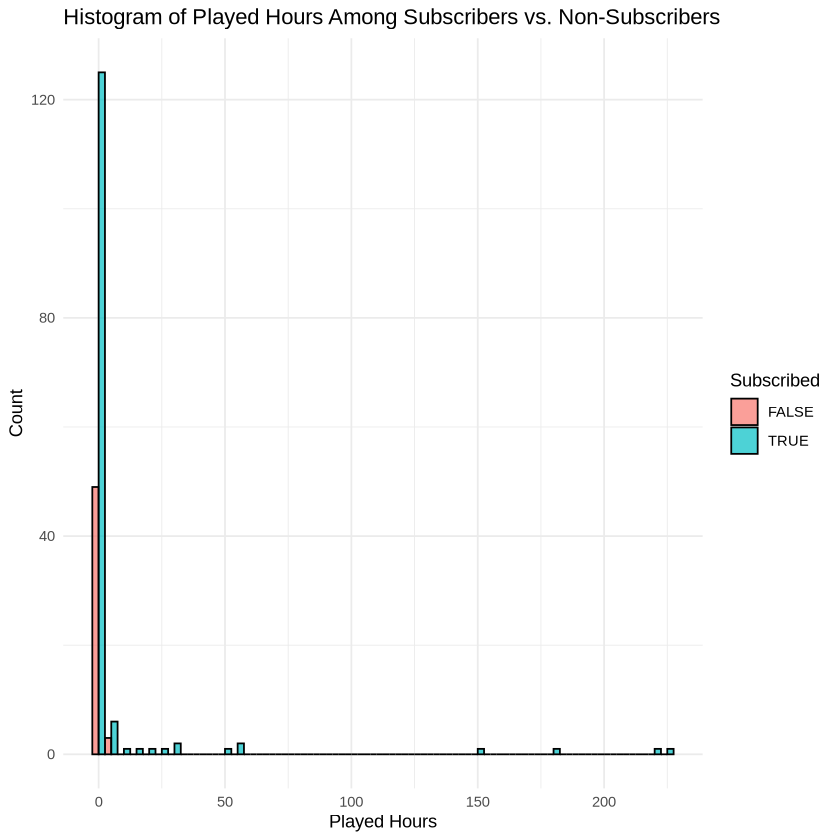

In [44]:
sub_vs_not <- ggplot(players, aes(x = played_hours, fill = subscribe)) +
  geom_histogram(binwidth = 5, position = "dodge", color = "black", alpha = 0.7) +
  labs(
    title = "Histogram of Played Hours Among Subscribers vs. Non-Subscribers",
    x = "Played Hours",
    y = "Count",
    fill = "Subscribed") +
  theme_minimal()

sub_vs_not

**Figure 4:**

A graph showing the relationship between Played Hours and Count

### Visualization: Played Hours vs. Subscription Status

This histogram illustrates the relationship between the amount of hours played and whether the player is subscribed to the newsletter (`subscribe`).

- **X-axis:** Total hours played (`played_hours`).
- **Y-axis:** Count of players.
- **Fill color:** Distinguishes between subscribers (`TRUE`) and non-subscribers (`FALSE`).

#### **Insights from the Histogram**
- The distribution of played hours varies between subscribed and non-subscribed players.
- If there is a noticeable trend (e.g., more experienced players subscribing), this might indicate that longer playtime is correlated with a higher likelihood of subscription.
- If the distributions are similar, then **playtime might not be a strong predictor of newsletter subscription.

In order to determine the relationship between the experience level and the subscription status, this data can be presented on another histogram:

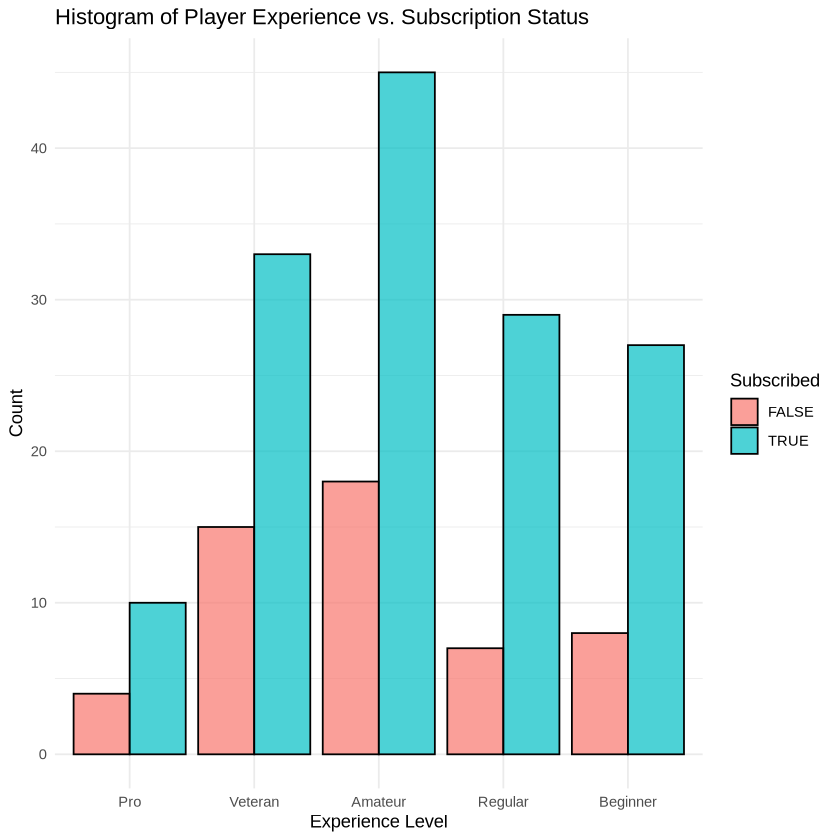

In [45]:
experience_vs_subscribe <- ggplot(players, aes(x = experience, fill = subscribe)) +
  geom_bar(position = "dodge", color = "black", alpha = 0.7) +
  labs(
    title = "Histogram of Player Experience vs. Subscription Status",
    x = "Experience Level",
    y = "Count",
    fill = "Subscribed") +
  theme_minimal()

experience_vs_subscribe

**Figure 5:**

A histogram showing the newsletter subscription across different player experience levels

### **Visualization: Experience Level vs. Subscription Status**

This histogram illustrates the relationship between a player's experience level and whether they are subscribed to the newsletter (`subscribe`).

- **X-axis:** Experience level (`Amateur`, `Beginner`, `Regular`, `Pro`, `Veteran`).
- **Y-axis:** Count of players in each experience level.
- **Fill color:** Differentiates between subscribers (`TRUE`) and non-subscribers (`FALSE`).

#### **Insights from the Histogram**
- Regular and Beginner players have the highest subscription rates (80.6% and 77.1%, respectively).
- Veterans have the lowest subscription rate (68.8%), which is unexpected given their experience.
- Amateurs and Pros have similar subscription rates (71.4%).
- The trend suggests that Regular players may be more engaged with the game and community**, making them more likely to subscribe.
- The lower subscription rate among Veterans could indicate that they are less interested in game-related external content.



## **3. Data Analysis**


In [46]:
knn_players <- nearest_neighbor(weight_func = "rectangular", neighbors = tune())|>
                set_engine("kknn")|>
                set_mode("classification")
knn_players

K-Nearest Neighbor Model Specification (classification)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


This single line sets up a KNN model that will automatically find the optimal number of neighbors to predict whether players will subscribe to the newsletter. However, we want to see what the best K value is for this data and use it to solve for the confusion matrix. 

## Splitting the Data
We will start to create our own KNN classification for predicting whether the users will subscribe or not. First, we use initial_split to seperate 80% of our data to train the model and 20% to test it. The model will not access the testing data until the last prediction step, ensuring that there is a balance and accuracy in the performance

In [47]:
#Splitting and Training the Data
set.seed(123)
player_split <- initial_split(players, prop = 0.8, strata = subscribe)
player_train <- training(player_split)
player_test <- testing(player_split)

#Summarizing it
players_summary <- player_train |>
                    group_by(subscribe)|>
                    summarize(mean_played_hours = mean(played_hours), 
                              mean_age = mean(Age, na.rm = TRUE),
                              
                              n_of_players = n())
players_summary

subscribe,mean_played_hours,mean_age,n_of_players
<fct>,<dbl>,<dbl>,<int>
FALSE,0.5073171,23.78049,41
TRUE,9.1460870,19.86726,115


**Figure 6:**
From the summary of the players' training data, it appears that subscribers tend to have higher playing hours, a younger age, and more number of players

## Standardizing the Predictors
KNN classification uses distance calculations for the basis of similarity, therefore, we need to snure that the training data has been standardized.
To do this, we created a recipe for our variables and used step_dummy, step_scale and step_center to standardized the predictors

In [48]:
set.seed(123)
player_recipe <- recipe(subscribe ~ experience + played_hours, data = player_train) |>
  step_dummy(all_nominal_predictors()) |>
  step_scale(all_numeric_predictors()) |> 
  step_center(all_numeric_predictors())  

## Finding the best K-nearest Neighbour
We define our KNN model with neighbors = tune() to find the best K-nearest neighbour value

In [49]:
knn_players <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
  set_engine("kknn") |>
  set_mode("classification")

player_workflow <- workflow() |>
  add_recipe(player_recipe) |>
  add_model(knn_players)

## Crossvalidation

[1] "Best k value: 15"
# A tibble: 2 × 3
  .metric  .estimator .estimate
  <chr>    <chr>          <dbl>
1 accuracy binary         0.7  
2 kap      binary         0.152


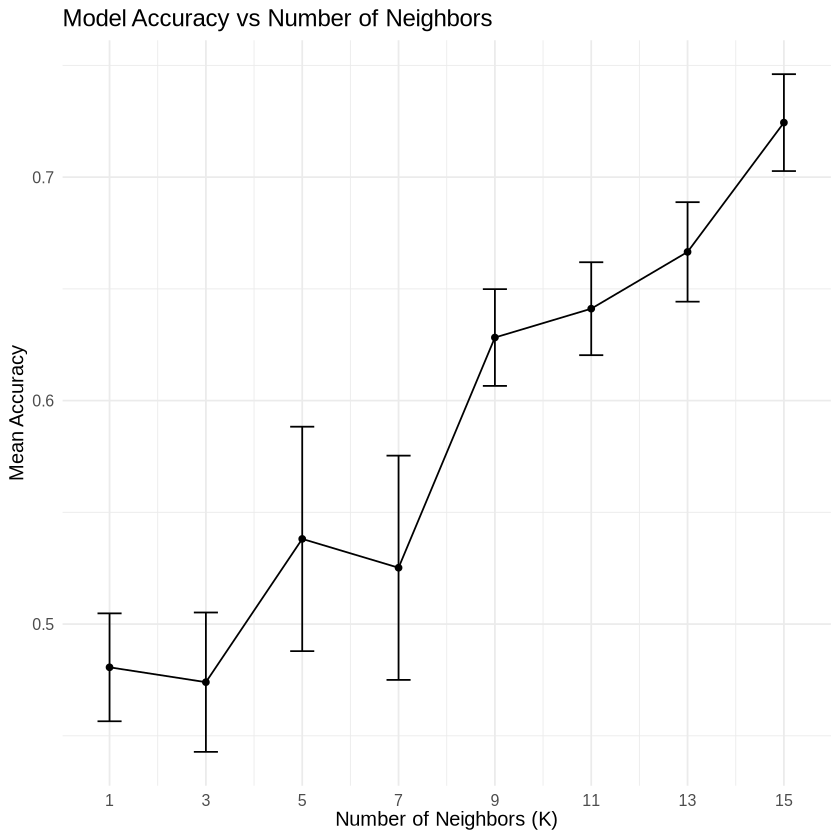

In [50]:
## Cross Validation 
player_folds <- vfold_cv(player_train, v = 5, strata = subscribe)
k_grid <- tibble(neighbors = seq(1, 15, by = 2))

# Perform grid search to find the best K value across cross-validation folds
tune_results <- player_workflow |>
  tune_grid(resamples = player_folds, grid = k_grid) |>
  collect_metrics()

# Select the K value with the highest accuracy
best_k <- tune_results |>
  filter(.metric == "accuracy") |>
  arrange(desc(mean)) |>
  slice(1) |>
  pull(neighbors)

# Fit the final model using the best K value found
final_model <- player_workflow |>
  update_model(nearest_neighbor(weight_func = "rectangular", neighbors = best_k) |>
               set_engine("kknn") |>
               set_mode("classification")) |>
  fit(data = player_train)

# Generate predictions on the test set
preds <- predict(final_model, player_test)
truth_values <- player_test$subscribe
test_results <- bind_cols(preds, subscribe = truth_values)

print(paste("Best k value:", best_k))
print(metrics(test_results, truth = subscribe, estimate = .pred_class))

# Accuracy vs K Plot
accuracy_vs_k_plot <- ggplot(tune_results %>% filter(.metric == "accuracy"), 
                              aes(x = neighbors, y = mean)) +
  geom_point() +
  geom_line() +
  geom_errorbar(aes(ymin = mean - std_err, ymax = mean + std_err), width = 0.5) +
  labs(
    title = "Model Accuracy vs Number of Neighbors",
    x = "Number of Neighbors (K)", 
    y = "Mean Accuracy"
  ) +
  theme_minimal() +
  theme(text = element_text(size = 12)) +
  scale_x_continuous(breaks = unique(tune_results$neighbors))

accuracy_vs_k_plot

**Figure 7:** 
The Graph above shows the number of neighbours versus the Mean accuracy values

Based on our analysis of player characteristics and behavior, we found that experience level and played hours are moderately predictive of newsletter subscription likelihood, with our k-NN model achieving 70% accuracy. This suggests that game publishers can use these player attributes to reasonably identify potential newsletter subscribers, though not with perfect precision. The model's Cohen's Kappa value of 0.152 indicates performance better than random chance but highlights that subscription behavior is influenced by additional factors beyond those analyzed. Player experience level appears particularly informative, as the model was able to distinguish subscription patterns across Amateur, Regular, Veteran, and Pro categories. These findings indicate that while experience level and engagement (measured through played hours) do influence subscription decisions, game publishers should consider incorporating additional player data to further improve their predictive accuracy for newsletter targeting strategies.

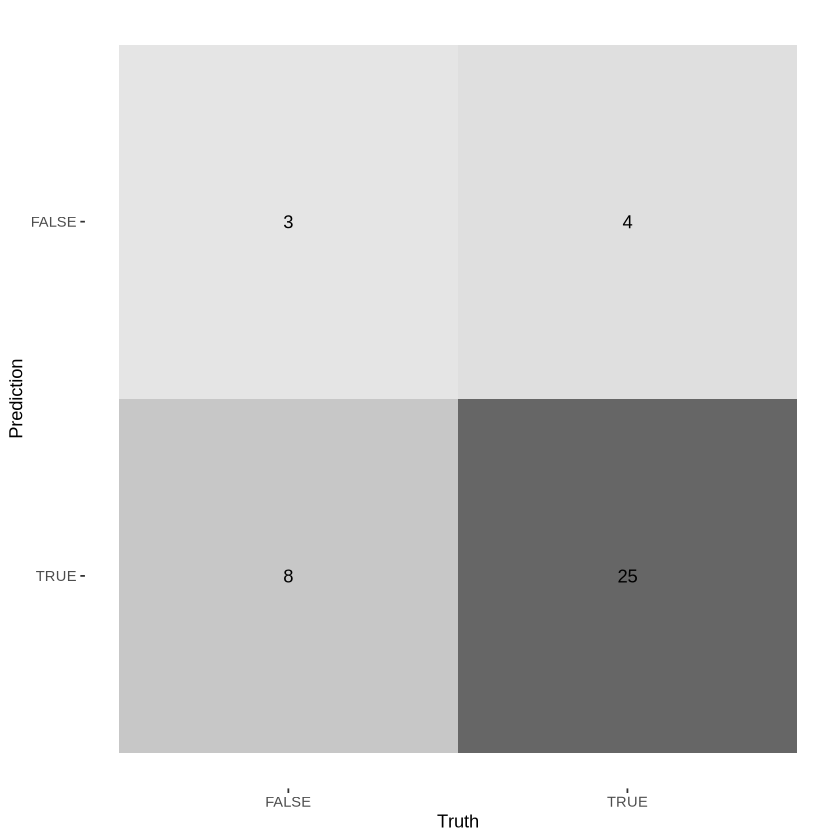

In [51]:
conf <- conf_mat(test_results, truth = subscribe, estimate = .pred_class)
conf |> autoplot(type = "heatmap")

**Figure 8:**
This heatmap shows the confusion matric of the performance

The confusion matrix reveals the performance of our newsletter subscription prediction model. Out of 40 total instances, the model correctly identified 25 subscribers (true positives) and 3 non-subscribers (true negatives), resulting in a 70% overall accuracy. The model shows strength in precision, with 86% of its positive predictions being correct. However, it missed 8 potential subscribers (false negatives), suggesting there's room for improvement in capturing all subscribers. The relatively high precision indicates that when the model predicts a player will subscribe, it's usually right. The slight weakness in recall suggests the model might be conservative in its predictions, potentially overlooking some players who would be interested in the newsletter.RetryClaude can make mistakes. Please double-check responses.

# **4. Discussion**

<body>
    <div class="section">
        <h2>Summary of the Results</h2>
        <p>To determine whether a player's experience level and the number of hours they have played affect subscription, we plotted histograms showing the relationship between played hours and subscription, and player experience and subscription. In the histogram of played hours and subscriptions, we observed that most counts are in the 0-12 hour range. Players who did not subscribe are all within the 0-12 hours range, while subscribed players span 0-270 hours. Players who have played over 12 hours tend to subscribe to the newsletter. However, by examining the counts, the subscription status appears only marginally affected by playtime, as most counts for both groups cluster around 0-12 hours. Therefore, playtime might not be a strong predictor of newsletter subscription.</p>
 <p>In the histogram of player experience and subscription, we can see that all levels show a higher percentage of subscribed players. Regular and beginner players have the highest subscription rates (80.6% and 77.1%, respectively). Amateurs and pro players have similar subscription rates (71.4%), while veteran players have the lowest subscription rate (68.8%). This suggests that regular players (80.6% subscribed) might be more engaged with the game and community, whereas the newsletter appears less interesting to veteran players.</p>
    </div>
    <div class="section">
        <h2>What we Expected to Get</h2>
        <p>For the played hours of the players, we expected that longer gameplay would correlate with a higher chance of newsletter subscription. However, the histogram of played hours among subscribers and non-subscribers revealed similar distribution patterns.</p>
  <p>Regarding player experience, we anticipated that more experienced players would have a higher subscription likelihood. Contrary to our expectations, veterans showed the lowest subscription rate (68.8%), while regular and beginner players demonstrated the highest subscription rates (80.6% and 77.1%, respectively).</p>
 <p>Ultimately, both initial hypotheses were not supported by the data.</p>
 </div>
 <div class="section">
        <h2>Impacts of These Results</h2>
        <p>The game-related newsletter can leverage these findings to improve subscriber engagement. Since regular and beginner players show the highest subscription rates, the newsletter could:</p>
        <ul>
            <li>Provide targeted information specifically addressing the needs of regular and beginner players</li>
            <li>Send notifications about game changes primarily affecting these player segments</li>
            <li>Share event information that specifically interests and benefits newer players</li>
        </ul>
<p>To attract veterans and pro players, the newsletter might:</p>
        <ul>
            <li>Develop more sophisticated, in-depth content</li>
            <li>Send notifications about advanced updates or complex game mechanics</li>
            <li>Create sections that challenge and engage more experienced players</li>
        </ul>
  <p>The primary impact lies in customizing newsletter content and style to match different player experience levels.</p>
    </div>
  <div class="section">
        <h2>Future Questions</h2>
        <p>The observed decline in subscription rates from regular to veteran players raises several intriguing research questions:</p>
        <ul>
            <li>What causes the decreasing interest in newsletters as players become more experienced?</li>
            <li>Can we develop predictive models to identify which players are likely to stop subscribing as they progress?</li>
            <li>What strategies could prevent player disengagement from the newsletter over time?</li>
            <li>Are there specific content or communication approaches that could maintain veteran players' interest?</li>
        </ul>
  <p>These questions suggest promising avenues for future research into player engagement and communication strategies in online gaming communities.</p>
    </div>
</body>

# **References**

Canossa, A., & Togelius, J. (2010). Patterns of player retention in a long-term social game.

Cover, Thomas, and Peter Hart. 1967. “Nearest Neighbor Pattern Classification.” IEEE Transactions on Information Theory 13 (1): 21–27.